### Random Forest_Company Data

In [1]:
## Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Reading Dataset
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x187533e9ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x187533fe5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187533e9b80>],
 'medians': [<matplotlib.lines.Line2D at 0x187533feca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x187533fefa0>],
 'means': []}

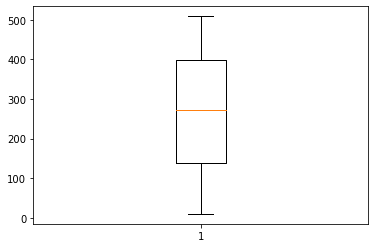

In [5]:
plt.boxplot(data['Population'])

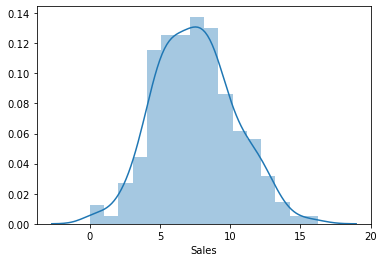

In [6]:
sns.distplot(data['Sales'])

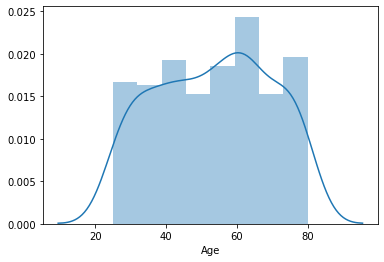

In [7]:
sns.distplot(data['Age'])

(array([ 96.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0., 219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

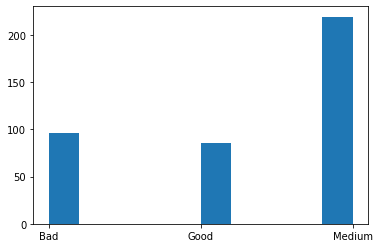

In [8]:
plt.hist(data['ShelveLoc'])

In [9]:
sales_cat = pd.cut(data['Sales'], bins=(-1, 6, 12, 18), labels=(1, 2, 3))
sales_cat.head()

0    2
1    2
2    2
3    2
4    1
Name: Sales, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [10]:
sales_cat.isnull().sum()

0

In [11]:
data['Sales_category'] = sales_cat
data.sort_values(by='Sales', ascending = True)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
174,0.00,139,24,0,358,185,Medium,79,15,No,No,1
106,0.16,102,33,0,217,139,Medium,70,18,No,No,1
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes,1
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes,1
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18,13.91,110,110,0,408,68,Good,46,17,No,Yes,3
367,14.37,95,106,0,256,53,Good,52,17,Yes,No,3
25,14.90,139,32,0,176,82,Good,54,11,No,No,3
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes,3


In [12]:
data.drop(['Sales'], axis= 1, inplace=True)
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,141,64,3,340,128,Bad,38,13,Yes,No,1


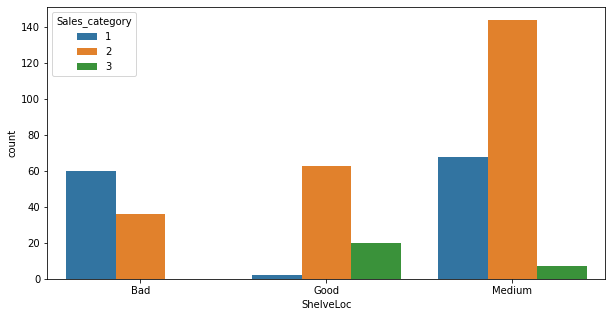

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'ShelveLoc', hue = 'Sales_category', data= data)

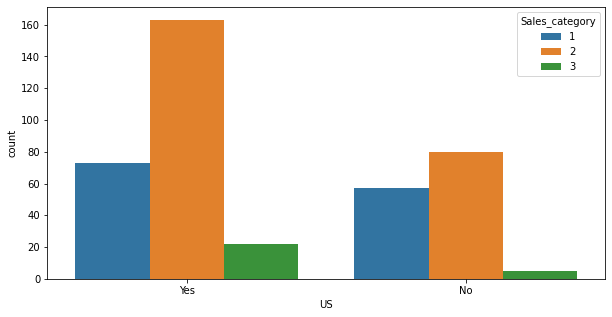

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'US', hue = 'Sales_category', data= data)

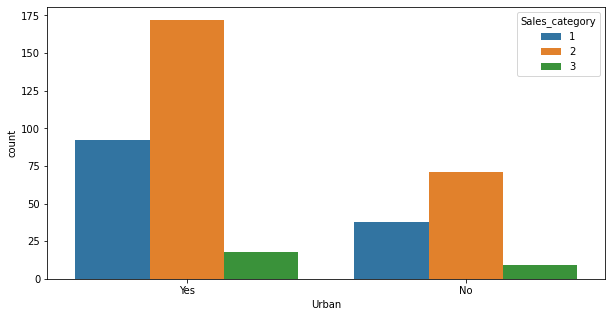

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Urban', hue = 'Sales_category', data= data)

In [16]:
X = data.iloc[:, 0:10]
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [17]:
Y = data['Sales_category']
Y.head()

0    2
1    2
2    2
3    2
4    1
Name: Sales_category, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [18]:
## One hot encoding
X = pd.get_dummies(X)
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [19]:
cols = X.columns
cols

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [20]:
### Normalizing the data
from sklearn.preprocessing import MinMaxScaler

In [21]:
scalar = MinMaxScaler()
X_norm = scalar.fit_transform(X)
X_norm

array([[0.62244898, 0.52525253, 0.37931034, ..., 1.        , 0.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 1.        , 0.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 1.        , 0.        ,
        1.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 1.        , 0.        ,
        1.        ],
       [0.58163265, 0.16161616, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [22]:
X = pd.DataFrame(X_norm, columns=cols)
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
## Splitting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2)

In [24]:
X_train.shape

(300, 14)

In [25]:
X_test.shape

(100, 14)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
num_trees = 200
max_features = 4
kfold = KFold(n_splits=10)

#### Model Builiding - Random Forest

In [28]:
model_1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_1.fit(X_train, Y_train)

RandomForestClassifier(max_features=4, n_estimators=200)

In [29]:
model_1.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [30]:
results_train = cross_val_score(model_1, X_train, Y_train, cv=kfold)
train_acc = (results_train.mean()*100).round(3)
train_acc

75.333

In [31]:
results_test = cross_val_score(model_1, X_test, Y_test, cv=kfold)
test_acc = (results_test.mean()*100).round(3)
test_acc

70.0

In [32]:
imp_feature = pd.Series(model_1.feature_importances_, index=X.columns).sort_values(ascending= False)
imp_feature

Price               0.222311
CompPrice           0.119655
Age                 0.109358
Population          0.106979
Income              0.099659
Advertising         0.089040
ShelveLoc_Bad       0.073388
Education           0.055591
ShelveLoc_Good      0.051500
ShelveLoc_Medium    0.026956
US_No               0.012254
US_Yes              0.012124
Urban_No            0.011152
Urban_Yes           0.010033
dtype: float64

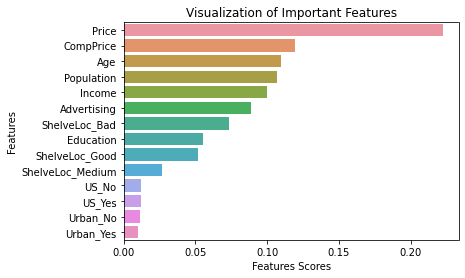

In [33]:
## Visualizing the best features
sns.barplot(x = imp_feature, y=imp_feature.index)
plt.xlabel('Features Scores')
plt.ylabel('Features')
plt.title('Visualization of Important Features')
plt.show()

In [34]:
from sklearn.ensemble import BaggingClassifier

#### Model Building - Bagging

In [35]:
fold = KFold(n_splits=5)
rand_for = RandomForestClassifier()
trees = 100
model_2 = BaggingClassifier(base_estimator=rand_for, n_estimators=trees)
model_2.fit(X_train, Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [36]:
y_pred_train = model_2.predict(X_train)
y_pred_train

array([2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 1,
       2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2], d

In [37]:
m2_result_train = cross_val_score(model_2, X_train, Y_train, cv=fold)

In [39]:
m2_acc_train = (m2_result_train.mean()*100).round(3)
m2_acc_train

75.0

In [41]:
y_pred_test = model_2.predict(X_test)
y_pred_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [42]:
m2_result_test = cross_val_score(model_2, X_test, Y_test, cv= fold)


In [43]:
m2_acc_test = (m2_result_test.mean()*100).round(3)
m2_acc_test

65.0

In [44]:
mod_acc = {'Model': ['Model_1_Train', 'Model_1_Test', 'Model_2_Train', 'Model_2_Test'], 'Accuracy': [train_acc, test_acc, m2_acc_train, m2_acc_test]}

In [45]:
## Accuracy Table.
acc_df = pd.DataFrame(mod_acc)
acc_df

,Model,Accuracy
0,Model_1_Train,75.333
1,Model_1_Test,70.000
2,Model_2_Train,75.000
3,Model_2_Test,65.000
